In [2]:
%cd ..

C:\Users\Behnia2P2\Navid\Projects\dreye


In [3]:
import numpy as np
import dreye
from dreye.stimuli.hyperspectral import baden_unpacking as bu
from dreye.estimators.dependent_excitation_models import DependentExcitationFit
import matplotlib.pyplot as plt

c:\users\behnia2p2\navid\projects\axolotl\axolotl\__init__.py:17: UserWarning: ATTENTION: Unable to setup necessary loris configuration to connect to database!!!
Once the issue is resolved, can connect to the database by trying to import the `conn` method: `from axolotl.sql import conn`
This is the error that popped up:
No module named 'loris_config_files'
  warnings.warn(


In [4]:
# path to raw data
path = 'dreye/stimuli/hyperspectral/alldata_formatted_cactus.txt'

In [5]:
image_array = np.genfromtxt(path, delimiter=',', dtype='float64', missing_values=('-inf'))

In [6]:
image_array.shape

(800, 1000)

In [7]:
data, wls = bu.preprocess_baden(image_array)

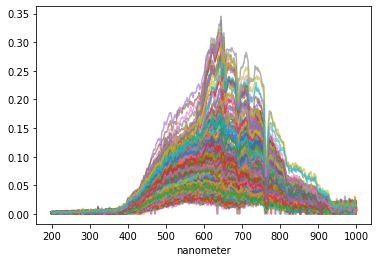

In [8]:
for i in range(data.shape[0]):
    plt.plot(wls, data[:,i], alpha=0.6)

In [22]:
mspectra = dreye.MeasuredSpectrum(data)

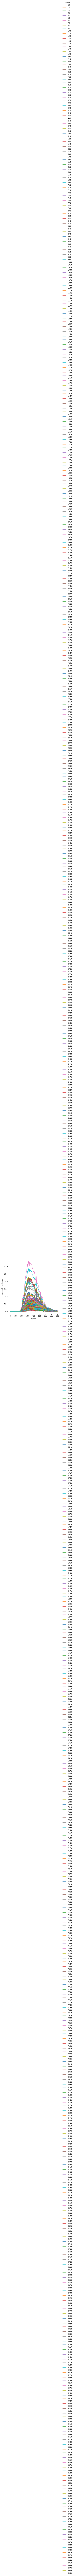

In [24]:
mspectra.plot()

In [25]:
mspectra.intensity_bounds

(7.542255906401378, 325.228777524768)

In [26]:
pr_model = dreye.create_photoreceptor_model(
    [360, 430, 550], 
#     photoreceptor_type='log', 
#     capture_noise_level=1e-4
)

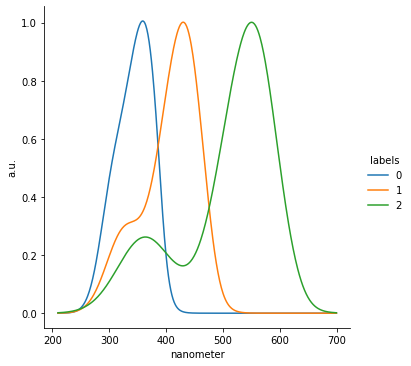

In [27]:
pr_model.sensitivity.plot()

In [28]:
layer_assignments = [
    [0, 2], [0, 1], [1, 2], [0, 1], [1, 2], [0, 1], [0, 2]
]

In [33]:
rng = np.random.default_rng(14)

In [36]:
resolution = (1000, 1)
n_subframes = len(layer_assignments)
bit_depth = 5
n_pixels = resolution[0] * resolution[1]

# random weights for leds
led_weights = rng.random(
    (len(mspectra), n_subframes)
) * 40
led_weights = np.zeros(
    (len(mspectra), n_subframes)
)
for idx, idcs in enumerate(layer_assignments):
    led_weights[idcs, idx] = rng.random(len(idcs)) * 40


# normalized capture matrix
A = pr_model.capture(
    mspectra, 
    return_units=False
)

pixel_strength = rng.random((n_pixels, n_subframes))
pixel_strength = pixel_strength / np.max(pixel_strength)
pixel_strength = (np.ceil(pixel_strength * 2**bit_depth) - 1) / (2**bit_depth - 1)

X = (pixel_strength @ led_weights.T) @ A
X = pr_model.excitefunc(X)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1000 is different from 800)